In [1]:
import matplotlib.pyplot as plt
import numpy as np
from script.multi_points_modeling import multi_points_modeling
TI = np.loadtxt('ti_strebelle.dat', skiprows = 3).reshape(250,250,1)

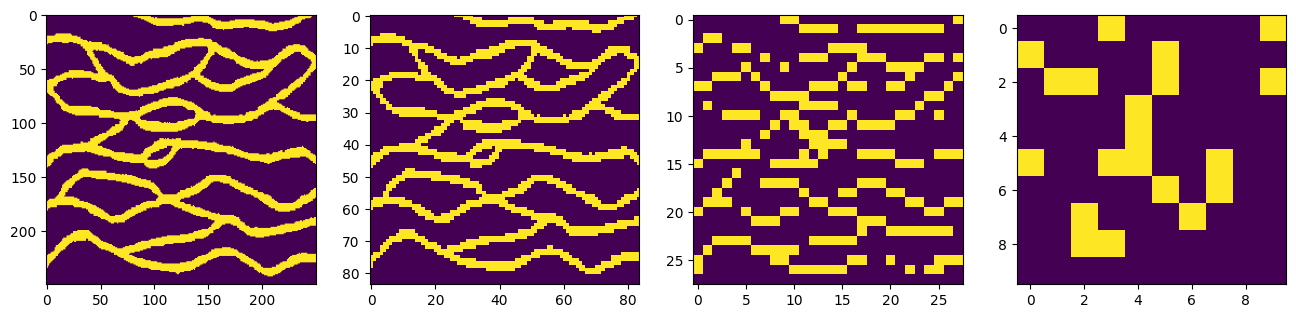

In [2]:
# training image per different level - 0(original), 1, 2(coarser), ...
templeate_size = [3, 3, 1]
tx, ty, tz = templeate_size[0], templeate_size[1], templeate_size[2]

plt.figure(figsize = (16, 4))

for level in range(4):
    plt.subplot(1, 4, level+1)
    plt.imshow(TI[::tx**level, ::ty**level, ::tz**level])


In [3]:
# realization extent per different levels
real_nx, real_ny, real_nz = 100, 100, 1
nx, ny, nz = real_nx, real_ny, real_nz
for level in range(4):
    print(f'at level - {level}:')
    print(f'    {nx} x {ny} x {nz}')
    nx, ny, nz = round(nx/tx), round(ny/ty), round(nz/tz)



at level - 0:
    100 x 100 x 1
at level - 1:
    33 x 33 x 1
at level - 2:
    11 x 11 x 1
at level - 3:
    4 x 4 x 1


In [23]:
random_seed = 77777
n_real = 1
real_nx, real_ny, real_nz = 100, 100, 1
template_size = [3, 3, 1]
tx, ty, tz = templeate_size[0], templeate_size[1], templeate_size[2]

n_level = 3 # 1 - no multi-scael, 2 - 2 levels, 3 - 3 levels, 4 - 4 levels

TI_s, grid_size_s = [], []
nx, ny, nz = real_nx, real_ny, real_nz
for level in range(n_level):
    TI_s.append(TI[::tx**level, ::ty**level, ::tz**level])
    grid_size_s.append((nx, ny, nz))
    nx, ny, nz = round(nx/tx), round(ny/ty), round(nz/tz)

real_s = []
real = np.ones(grid_size_s[-1]) * -1
for level, TI_at_level, grid_size_at_level in zip(range(n_level)[::-1],TI_s[::-1], grid_size_s[::-1]):
    real = multi_points_modeling(TI_at_level, template_size, random_seed, grid_size_at_level[0], grid_size_at_level[1], grid_size_at_level[2], real, verbose = True)
    real_s.append(real)
    if level == 0:
        break
    real_next = np.ones(grid_size_s[level-1]) * -1
    real_next[1::tx, 1::ty, :] = real
    real = real_next.copy()

hard data is conditioned
hard data is conditioned
hard data is conditioned


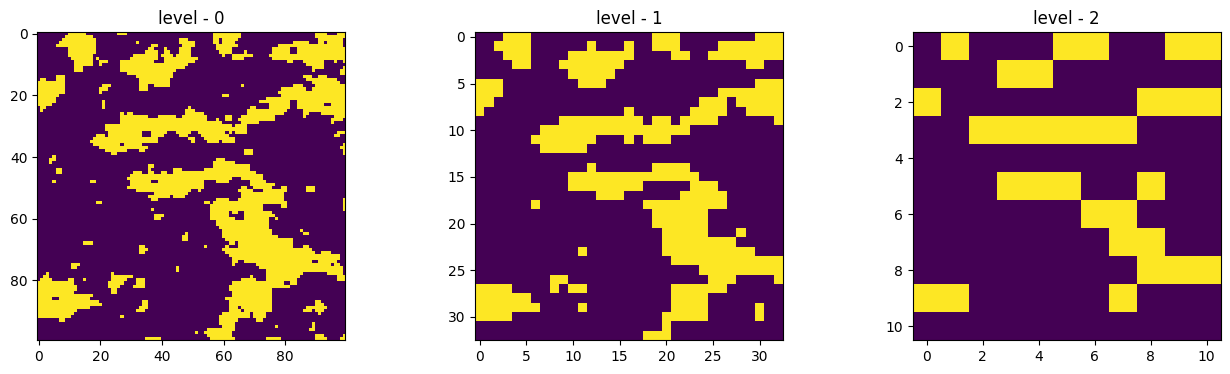

In [24]:
plt.figure(figsize=(16,4))
for i in range(3):
    plt.subplot(1,3, i+1)
    plt.title(f'level - {i}')
    plt.imshow(real_s[-i-1])

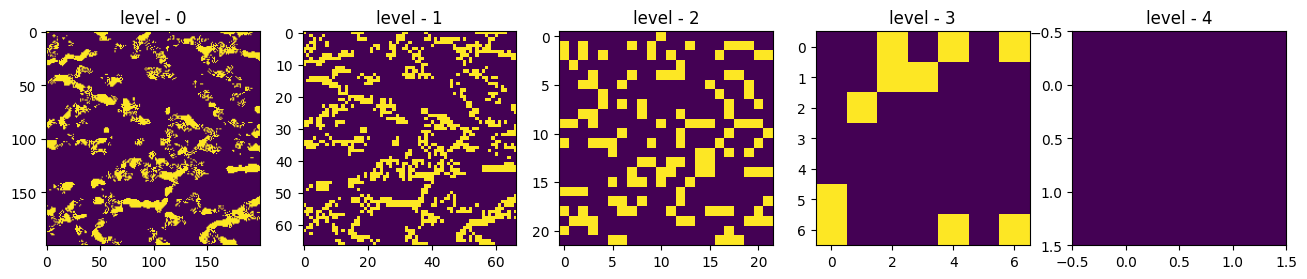

In [22]:
plt.figure(figsize=(16,4))
for i in range(5):
    plt.subplot(1,5, i+1)
    plt.title(f'level - {i}')
    plt.imshow(real_s[-i-1])

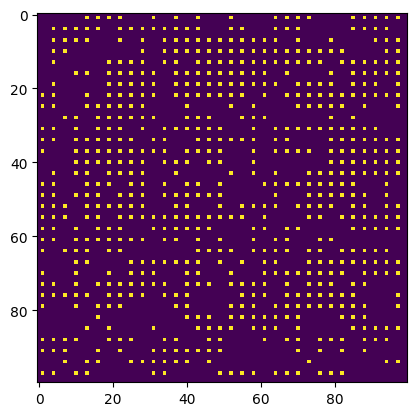

In [44]:
plt.imshow(np.array(real, dtype = float)==np.array(real_s[-1], dtype = float))

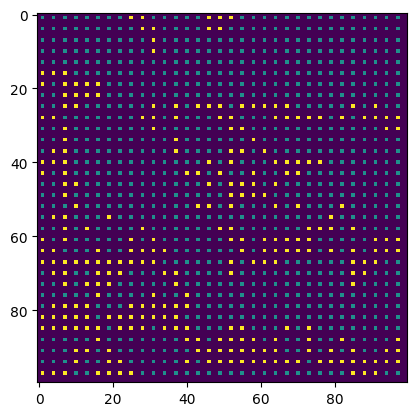

In [40]:
plt.imshow(real_s[-1])
# plt.imshow(real[1::tx, 1::ty])

In [ ]:
# define global parameters such as facies ratio, number of realizations, random seed, etc.
random_seed = 77777
n_real = 1
real_nx, real_ny, real_nz = 100, 100, 1
template_size = [3, 3, 1] # in x-, y-, and z- directions (odd number for better performance)
real = multi_points_modeling(TI, template_size, random_seed+1, real_nx, real_ny, real_nz)

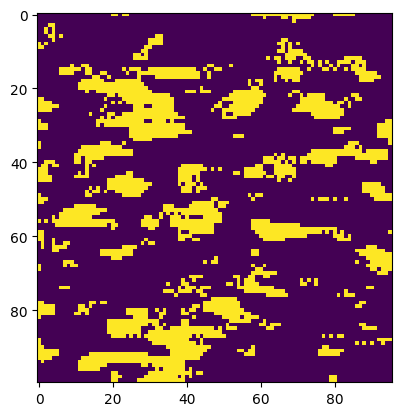

In [24]:
plt.imshow(real)